In [ ]:
from sklearn import datasets
import numpy as np
boston = datasets.load_boston(return_X_y = True)
print(boston)


In [ ]:
# Random Split
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
from random import random
train_X, train_y = load_boston(return_X_y = True)
# print(train_X)
x_total = train_X
y_total = train_y

X_train,X_test,y_train,y_test = train_test_split(x_total,y_total,test_size = 0.6,random_state = 1)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = 0.25,random_state = 1)
print(X_train.size)
print(X_test.size)
print(X_validation.size)

In [ ]:
import numpy as np
import random
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10):
    converged = False
    iter = 0
    m = x.shape[0]
    weight = np.ones(x.shape[1]+1)
    random.seed(10)
    for i in range(0,x.shape[1]+1):
      weight[i] = random.uniform(-0.3, 0.3)
    total_error = 0
    temp_in = 0
    for i in range(0,m):
      for j in range(0,x.shape[1]):
        temp_in = temp_in + weight[j+1]*x[i][j]
      total_error = total_error + (weight[0] + temp_in - y[i])**2
    sum = np.ones(x.shape[1]+1)
    while not converged:
        error = 0
        temp_in = 0
        temp_out = 0
        for i in range(0,m): 
          for j in range(0,x.shape[1]):
            temp_in = temp_in + weight[j+1]*x[i][j]
          temp_out = temp_out + (weight[0] + temp_in - y[j])*1
        sum[0] = temp_out

        for k in range(1,x.shape[1]):
          temp_in = 0 
          temp_out = 0
          for i in range(0,m):
            for j in range(0,x.shape[1]):
              temp_in = temp_in + weight[j+1]*x[i][j]
            temp_out = temp_out + (weight[1] + temp_in - y[j])*x[i][k]
          sum[k+1] = temp_out
        for j in range(0,x.shape[1]):
          weight[0] = weight[j] - (alpha/m) * sum[j]
        for i in range(0,m):
          for j in range(0,x.shape[1]):
            temp_in = temp_in + weight[j+1]*x[i][j]
          error = error + (weight[0] + temp_in - y[i])**2
        if abs(total_error-error) <= ep:
            converged = True
        total_error = error  # update error 
        iter += 1  # update iter
        if iter == max_iter:
            converged = True
    return weight,error

alpha = [ 0.1, 0.001, 0.0001, 0.5, 1.0]
mse = np.ones(5)
weight = np.ones(14)
for i in range(5):
  weight,mse[i] = gradient_descent(alpha[i], X_train, y_train, ep=0, max_iter=10)


weight,mse = gradient_descent(0.1, X_train, y_train, ep=0.5, max_iter=10)
# validation mse at alpha = 0.1
temp_in = 0
error=0
for i in range(0 ,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("alpha = 0.1 : " ,error)


weight,mse = gradient_descent(0.01, X_train, y_train, ep=0.6, max_iter=20)
# validation mse at alpha = 0.01
temp_in = 0 
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("alpha = 0.01 :",error)


weight,mse = gradient_descent(0.02, X_train, y_train, ep=0.7, max_iter=30)
# validation mse for alpha = 0.02
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("alpha = 0.02 :",error)


weight,mse = gradient_descent(0.03, X_train, y_train, ep=0.8, max_iter=40)
# validation mse at alpha = 0.03
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("alpha = 0.03 :",error)


weight,mse = gradient_descent(0.001, X_train, y_train, ep=0.9, max_iter=50)
# validation mse at alpha = 0.001
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("alpha = 0.001 :",error)


# best hyper
weight,mse = gradient_descent(0.001, X_train, y_train, ep=0.9, max_iter=50)
print("train mse :",mse)


# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("validation mse :",error)


temp_in = 0
error=0
for i in range(0,X_test.shape[0]): # vary the row
  for j in range(0,X_test.shape[1]):
    temp_in = temp_in + weight[j+1]*X_test[i][j]
  error = error + (weight[0] + temp_in - y_test[i])**2 # total error
print("test mse : ",error)

itr = [10,20,30,40,50,60]
ny_mse = np.ones(6)
for i in range(0,6):
  weight,mse = gradient_descent(0.3, X_train, y_train, ep=0.1, max_iter = itr[i])
  ny_mse[i] = mse

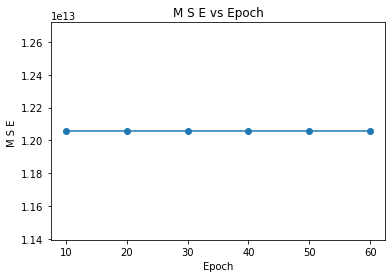

In [ ]:
import matplotlib.pyplot as plt
plt.title("M S E vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("M S E ")
plt.plot(itr, ny_mse,'-o')
plt.show()